## Data Cleaning

<b>Assumptions: </b>
Cells marked with "none" are cleared.
Cells marked with "n/a" or "." indicate presence of car but exact details are unkown.

In [46]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("darkgrid")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams["axes.labelsize"] = 15
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 50)


In [6]:
# read in dfs and combine
df = pd.DataFrame()

for i in ["Bridge at Loyola_Vehicle Report.xlsx","Residences at Decker_Vehicle Report.xlsx","The Beckett_Vehicle Report.xlsx"]:
    temp = pd.read_excel(f"data/{i}")
    df = pd.concat([df,temp],axis=0)

In [48]:
df["Own First Car"] = ~(df["Make"].apply(lambda x: pd.isnull(x)) & df["Model"].apply(lambda x: pd.isnull(x)) & df["Color"].apply(lambda x: pd.isnull(x)) & df["Year"].apply(lambda x: pd.isnull(x)))
df["Own Second Car"] = ~(df["Second Make"].apply(lambda x: pd.isnull(x)) & df["Second Model"].apply(lambda x: pd.isnull(x)) & df["Second Color"].apply(lambda x: pd.isnull(x)) & df["Second Year"].apply(lambda x: pd.isnull(x)))

Please review the Vehicle Reports for The Beckett, Residences at Decker, and Bridge at Loyola to assess the average number of vehicles per unit. 

We’d like to quantify at each property the number of residents without vehicles
number of residents with one vehicle, two vehicles

On average, we try to park our developments at approximately 1.7 spaces/unit, however what we’ve heard recently from the on-site property management teams is that close to 25% of the spaces go unused. With new development sites, we’ve recently been finding smaller sites where we aren’t able to site plan for our preferred yield, with a lot of space being reserved from parking. We want to explore the statistics behind this data to see if there is an opportunity to reduce these numbers. I would also like to have a survey prepared for each of the onsite management teams where they can provide feedback based on the parking situations at their sites.

In [60]:
# Check if tenants from a single unit are listed twice
df["unique_id"] = df["Property"] + "_" + df["Unit"].astype(str)
len(set(df["unique_id"])) == len(df["unique_id"])

True

In [65]:
means = df.groupby("Property").mean()[["Own First Car","Own Second Car"]]

C:\Users\randymi\AppData\Local\Temp\ipykernel_25560\1209665454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby("Property").mean()[["Own First Car","Own Second Car"]]


In [70]:
means

,Own First Car,Own Second Car
Property,,
txbeck,0.493151,0.031963
txdecker,0.082524,0.024272
txloyola,0.550725,0.021739


In [72]:
means["Average Cars Per Unit"] = means["Own First Car"] + means["Own Second Car"]

In [117]:
print(f"On Average only {means['Own First Car'].mean().round(3)} of units require a parking spot")
print(f"On Average only {means['Own Second Car'].mean().round(3)} of units require a second parking spot")
print(f"Average cars per unit: {means['Average Cars Per Unit'].mean().round(3)}")


On Average only 0.375 of units require a parking spot
On Average only 0.026 of units require a second parking spot
Average cars per unit: 0.401


In [98]:
means.to_csv("data/means.csv")

<AxesSubplot: title={'center': 'Average Cars Per Unit'}, xlabel='Property', ylabel='# Cars'>

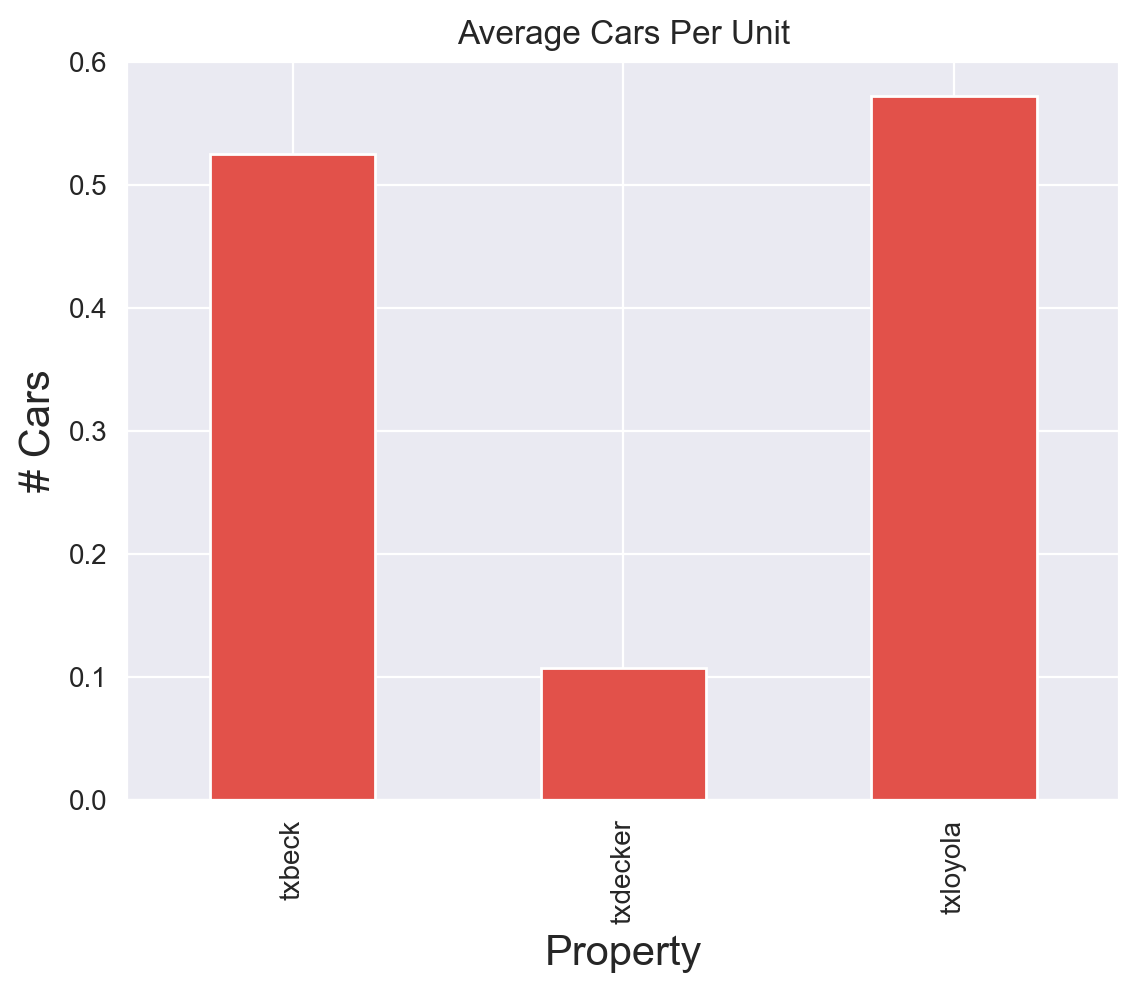

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
means[["Average Cars Per Unit"]].plot.bar(title = "Average Cars Per Unit",legend=False, ylabel = "# Cars", ax = ax)

In [90]:
fig.savefig("cars_per_unit.png")

In [109]:
mu

0.40145801329064595

In [110]:
sigma

0.2562805523691995

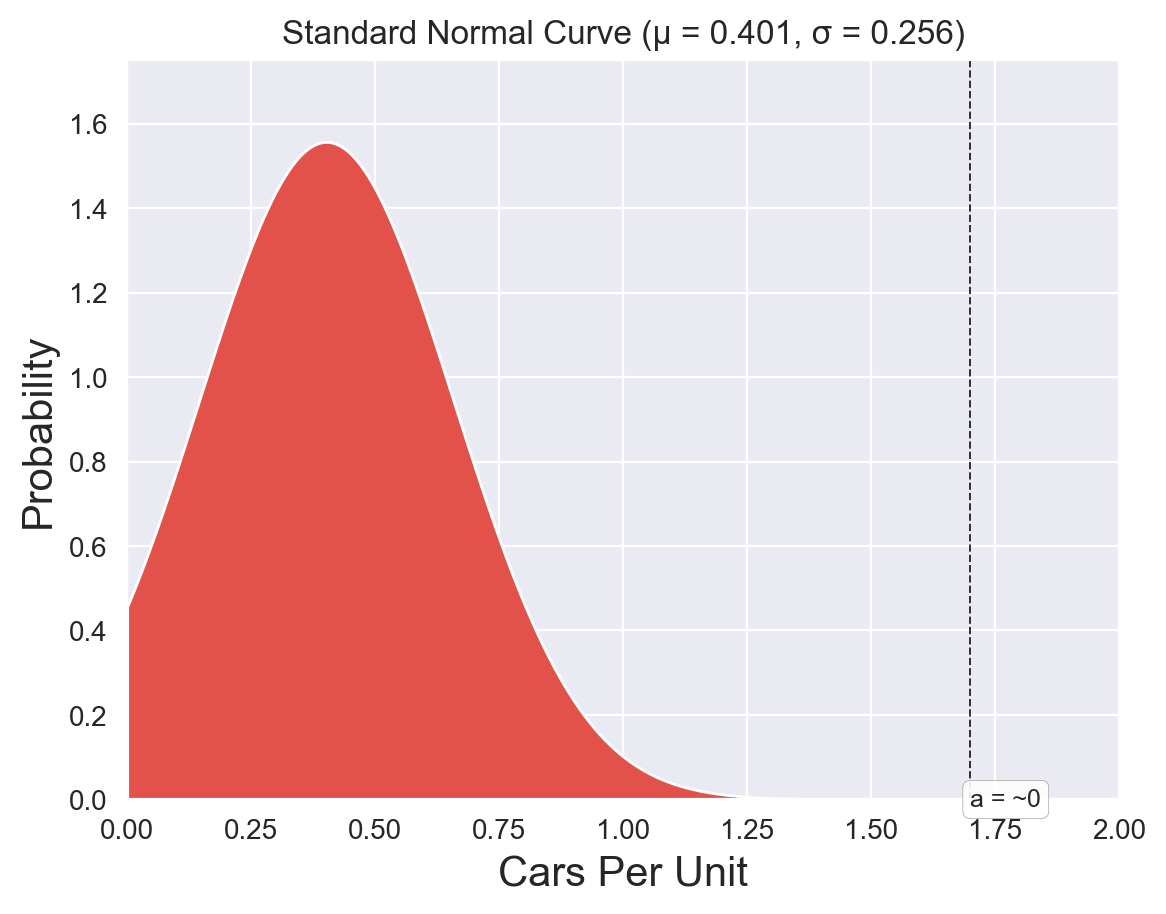

In [127]:
import scipy.stats as stats
import math

fig = plt.figure()
ax1 = fig.add_subplot(111)

mu = means["Average Cars Per Unit"].mean()
variance = means["Average Cars Per Unit"].var()
sigma = math.sqrt(variance)
x = np.linspace(0, 2, 500)
y = stats.norm.pdf(x, mu, sigma)
ax1.plot(x, y, alpha = 0)
ax1.fill_between(x, y)
ax1.axvline(1.7, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8)
ax1.set_ylim([0,1.75])
ax1.set_xlim([0,2])
ax1.set_title("Standard Normal Curve (μ = 0.401, σ = 0.256)")
ax1.set_xlabel("Cars Per Unit")
ax1.set_ylabel("Probability")
ax1.text(1.7, 0, 'a = ~0', ha='left', va='center', fontsize = 9,
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))
fig.savefig("normal_curve.png")

## Findings
* Probably there exists under-reporting, especially at decker
* Unaware of the standard deviation of cars per unit 